<a href="https://colab.research.google.com/github/Jubi-Wismi/hands-on-sql-3086685/blob/main/ResNet50_animal_predict_dissertationsep14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix

In [3]:

path = "/content/drive/MyDrive/animals/"

data = {"imgpath": [], "labels": []}

category = os.listdir(path)
for folder in category:
    folderpath = os.path.join(path, folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)

df = pd.DataFrame(data)

#Convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])

In [4]:
class_counts = df['labels'].value_counts().to_dict()
class_names = list(class_counts.keys())
print(class_counts)
print(class_names)
len(class_names )


{'whale': 60, 'goat': 60, 'duck': 60, 'fox': 60, 'elephant': 60, 'eagle': 60, 'donkey': 60, 'flamingo': 60, 'hornbill': 60, 'hamster': 60, 'gorilla': 60, 'hedgehog': 60, 'grasshopper': 60, 'horse': 60, 'hippopotamus': 60, 'hummingbird': 60, 'hare': 60, 'goose': 60, 'kangaroo': 60, 'hyena': 60, 'mosquito': 60, 'goldfish': 60, 'dragonfly': 60, 'wombat': 60, 'fly': 60, 'bison': 60, 'antelope': 60, 'bear': 60, 'badger': 60, 'beetle': 60, 'boar': 60, 'bee': 60, 'butterfly': 60, 'cat': 60, 'dog': 60, 'crow': 60, 'cow': 60, 'dolphin': 60, 'caterpillar': 60, 'cockroach': 60, 'deer': 60, 'crab': 60, 'chimpanzee': 60, 'coyote': 60, 'lion': 60, 'lizard': 60, 'ladybugs': 60, 'lobster': 60, 'raccoon': 60, 'shark': 60, 'seal': 60, 'sheep': 60, 'snake': 60, 'rhinoceros': 60, 'seahorse': 60, 'squirrel': 60, 'sparrow': 60, 'sandpiper': 60, 'squid': 60, 'swan': 60, 'wolf': 60, 'turtle': 60, 'zebra': 60, 'woodpecker': 60, 'tiger': 60, 'starfish': 60, 'turkey': 60, 'pigeon': 60, 'possum': 60, 'pig': 60, '

90

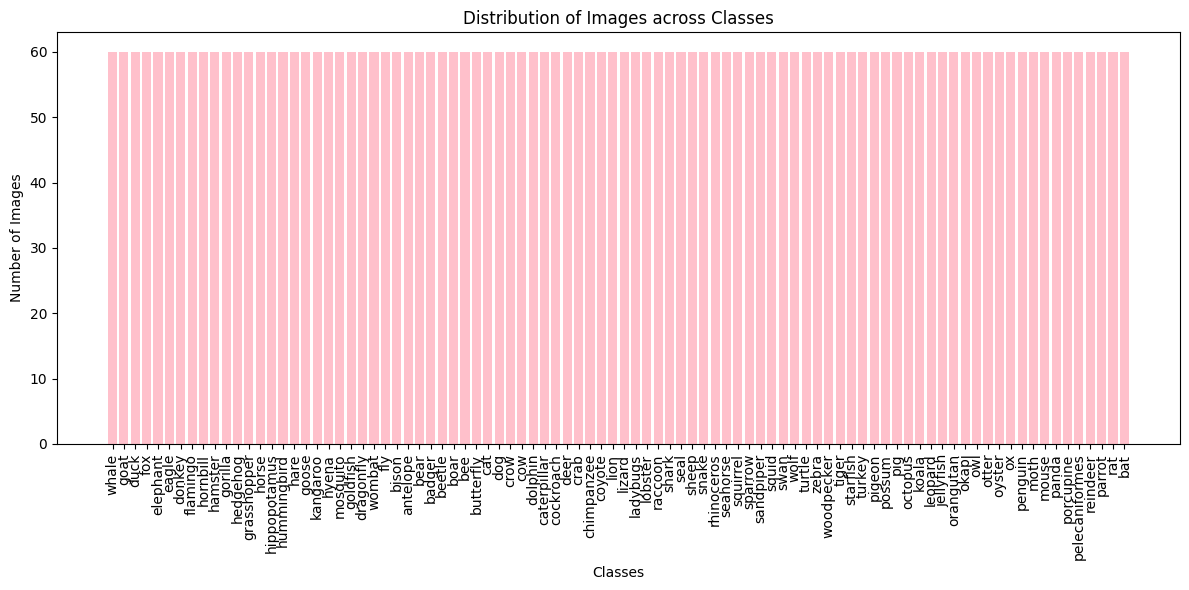

In [5]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
class_counts = {'whale': 60, 'goat': 60, 'duck': 60, 'fox': 60, 'elephant': 60, 'eagle': 60, 'donkey': 60, 'flamingo': 60, 'hornbill': 60, 'hamster': 60, 'gorilla': 60, 'hedgehog': 60, 'grasshopper': 60, 'horse': 60, 'hippopotamus': 60, 'hummingbird': 60, 'hare': 60, 'goose': 60, 'kangaroo': 60, 'hyena': 60, 'mosquito': 60, 'goldfish': 60, 'dragonfly': 60, 'wombat': 60, 'fly': 60, 'bison': 60, 'antelope': 60, 'bear': 60, 'badger': 60, 'beetle': 60, 'boar': 60, 'bee': 60, 'butterfly': 60, 'cat': 60, 'dog': 60, 'crow': 60, 'cow': 60, 'dolphin': 60, 'caterpillar': 60, 'cockroach': 60, 'deer': 60, 'crab': 60, 'chimpanzee': 60, 'coyote': 60, 'lion': 60, 'lizard': 60, 'ladybugs': 60, 'lobster': 60, 'raccoon': 60, 'shark': 60, 'seal': 60, 'sheep': 60, 'snake': 60, 'rhinoceros': 60, 'seahorse': 60, 'squirrel': 60, 'sparrow': 60, 'sandpiper': 60, 'squid': 60, 'swan': 60, 'wolf': 60, 'turtle': 60, 'zebra': 60, 'woodpecker': 60, 'tiger': 60, 'starfish': 60, 'turkey': 60, 'pigeon': 60, 'possum': 60, 'pig': 60, 'octopus': 60, 'koala': 60, 'leopard': 60, 'jellyfish': 60, 'orangutan': 60, 'okapi': 60, 'owl': 60, 'otter': 60, 'oyster': 60, 'ox': 60, 'penguin': 60, 'moth': 60, 'mouse': 60, 'panda': 60, 'porcupine': 60, 'pelecaniformes': 60, 'reindeer': 60, 'parrot': 60, 'rat': 60, 'bat': 60}

# Extract class names and corresponding image counts
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(class_names, image_counts, color='pink')
plt.xticks(rotation=90)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across Classes')
plt.tight_layout()
plt.show()


In [6]:
unique_labels = df['labels'].unique()

# Sort the unique labels alphabetically or in any desired order
unique_labels = sorted(unique_labels)

# Use the sorted unique_labels list as your labels
labels = unique_labels


In [7]:
print(labels)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


In [8]:
train_df, Temp_df = train_test_split(df,  train_size= 0.70 , shuffle=True, random_state=124)
valid_df , test_df = train_test_split(Temp_df ,  train_size= 0.70 , shuffle=True, random_state=124)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Validation----------")
print(valid_df[["imgpath", "labels"]].head(5))
print(valid_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

print(train_df.shape)

print(valid_df.shape)

print(test_df.shape)

----------Train-------------
                                             imgpath    labels
0  /content/drive/MyDrive/animals/hedgehog/4c9687...  hedgehog
1  /content/drive/MyDrive/animals/squid/8bd8c271a...     squid
2  /content/drive/MyDrive/animals/otter/5d2506616...     otter
3  /content/drive/MyDrive/animals/tiger/15b4abdb6...     tiger
4  /content/drive/MyDrive/animals/octopus/7d0a974...   octopus
(3779, 3)
--------Validation----------
                                             imgpath       labels
0  /content/drive/MyDrive/animals/parrot/46de4406...       parrot
1  /content/drive/MyDrive/animals/hedgehog/1fdc0e...     hedgehog
2  /content/drive/MyDrive/animals/caterpillar/061...  caterpillar
3  /content/drive/MyDrive/animals/elephant/70c11a...     elephant
4  /content/drive/MyDrive/animals/pig/6f2e4c525a.jpg          pig
(1134, 3)
----------Test--------------
                                             imgpath    labels
0  /content/drive/MyDrive/animals/dolphin/4a8c89c...   d

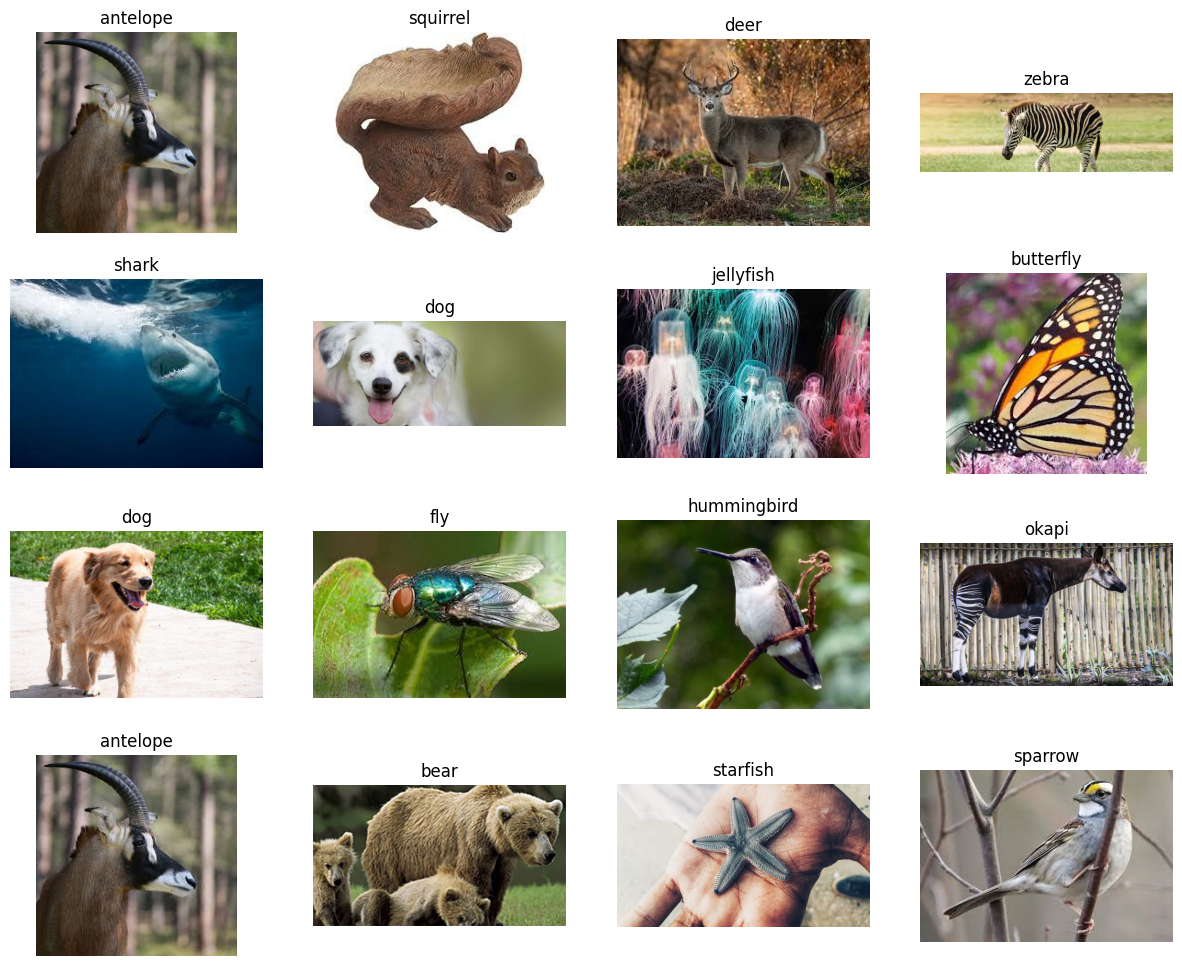

In [9]:

plt.figure(figsize=(15,12))
for i, row in test_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [10]:
# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
from tensorflow.keras.applications.resnet import preprocess_input
mixed_precision.set_global_policy('mixed_float16')

In [11]:
%%time
from tensorflow.keras.applications.resnet50 import preprocess_input
BATCH_SIZE = 36
IMAGE_SIZE = (224, 224)
generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,

)
# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)
val_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)
test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 3779 validated image filenames belonging to 90 classes.
Found 1134 validated image filenames belonging to 90 classes.
Found 487 validated image filenames belonging to 90 classes.
CPU times: user 130 ms, sys: 95.1 ms, total: 225 ms
Wall time: 864 ms


In [12]:

pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

# Freeze the layers of the pretrained model
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [13]:
num_classes = len(set(train_images.classes))


# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.15),
  layers.experimental.preprocessing.RandomZoom(0.15),
  layers.experimental.preprocessing.RandomContrast(0.15),
], name='AugmentationLayer')


inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(256)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(num_classes)(x)

outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x)


model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                              

In [14]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=15,
    callbacks=[
        EarlyStopping(monitor = "val_loss",
                               patience = 3,
                               restore_best_weights = True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('./checkpoints/my_checkpoint2final')
model.save("model3.h5")


Epoch 1/15
105/105 [==============================] - 1303s 12s/step - loss: 3.9869 - accuracy: 0.1458 - val_loss: 2.3100 - val_accuracy: 0.4436 - lr: 5.0000e-04
Epoch 2/15
105/105 [==============================] - 40s 385ms/step - loss: 2.4581 - accuracy: 0.4033 - val_loss: 1.4522 - val_accuracy: 0.6252 - lr: 5.0000e-04
Epoch 3/15
105/105 [==============================] - 42s 400ms/step - loss: 1.9523 - accuracy: 0.5179 - val_loss: 1.4071 - val_accuracy: 0.6367 - lr: 5.0000e-04
Epoch 4/15
105/105 [==============================] - 41s 388ms/step - loss: 1.6612 - accuracy: 0.5920 - val_loss: 1.2995 - val_accuracy: 0.6631 - lr: 5.0000e-04
Epoch 5/15
105/105 [==============================] - 41s 396ms/step - loss: 1.4776 - accuracy: 0.6364 - val_loss: 1.0443 - val_accuracy: 0.7346 - lr: 5.0000e-04
Epoch 6/15
105/105 [==============================] - 41s 393ms/step - loss: 1.3043 - accuracy: 0.6832 - val_loss: 0.9916 - val_accuracy: 0.7266 - lr: 5.0000e-04
Epoch 7/15
105/105 [========

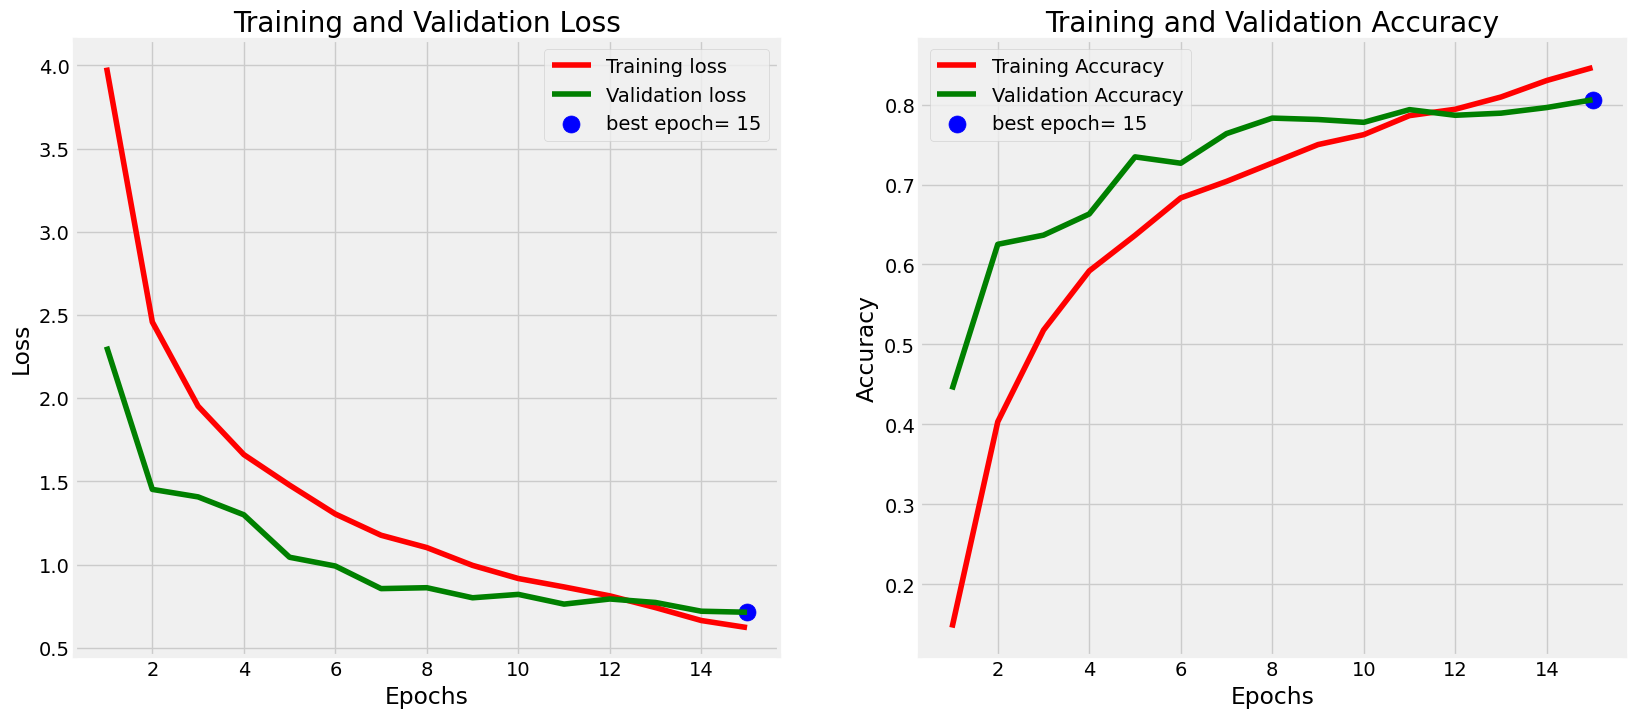

In [15]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [16]:

results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.80187
Test Accuracy: 79.67%


In [17]:
y_true = test_images.classes
y_pred = np.argmax(model.predict(test_images), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))


14/14 [==============================] - 6s 333ms/step
F1 Score: 0.7849096727528102
                precision    recall  f1-score   support

      antelope       0.46      0.86      0.60         7
        badger       1.00      1.00      1.00         2
           bat       0.50      0.67      0.57         3
          bear       0.89      1.00      0.94         8
           bee       0.60      1.00      0.75         3
        beetle       1.00      0.57      0.73         7
         bison       1.00      0.80      0.89         5
          boar       1.00      1.00      1.00         4
     butterfly       1.00      0.83      0.91         6
           cat       0.83      0.71      0.77         7
   caterpillar       0.00      0.00      0.00         3
    chimpanzee       1.00      0.33      0.50         6
     cockroach       1.00      1.00      1.00         4
           cow       1.00      1.00      1.00         4
        coyote       0.60      0.86      0.71         7
          crab     

In [18]:

classes = dict(zip(test_images.class_indices.values(), test_images.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(test_images.labels))),
                            "Test Labels" : test_images.labels,
                            "Test Classes" : [classes[i] for i in test_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_images), axis = 1))]
                           })
Predictions.head(25)

14/14 [==============================] - 4s 267ms/step


Image Index  Test Labels Test Classes  Prediction Labels  \
0             0           19      dolphin                 19   
1             1            6        bison                  6   
2             2           84       turtle                 84   
3             3            7         boar                  7   
4             4           24     elephant                 24   
5             5           29     goldfish                 29   
6             6           52      octopus                 52   
7             7           23        eagle                 23   
8             8           78        squid                 78   
9             9           17         deer                 17   
10           10           22         duck                 22   
11           11           86         wolf                 67   
12           12           39  hummingbird                 39   
13           13           33      hamster                 33   
14           14           79     squirrel                 79   
15           15           74        shark                 74   
16           16           54    orangutan                 54   
17           17           55        otter                 55   
18           18           38        horse                 20   
19           19           80     starfish                 80   
20           20           47       lizard                 10   
21           21           47       lizard                 47   
22           22           11   chimpanzee                 54   
23           23           46         lion                 55   
24           24           63          pig                 63   

   Prediction Classes                                               Path  \
0             dolphin  /content/drive/MyDrive/animals/dolphin/4a8c89c...   
1               bison  /content/drive/MyDrive/animals/bison/60d925696...   
2              turtle  /content/drive/MyDrive/animals/turtle/0a47b7d0...   
3                boar  /content/drive/MyDrive/animals/boar/549c6255cb...   
4            elephant  /content/drive/MyDrive/animals/elephant/18d284...   
5            goldfish  /content/drive/MyDrive/animals/goldfish/05f378...   
6             octopus  /content/drive/MyDrive/animals/octopus/72a7d3f...   
7               eagle  /content/drive/MyDrive/animals/eagle/5c75295ae...   
8               squid  /content/drive/MyDrive/animals/squid/4eff5f325...   
9                deer  /content/drive/MyDrive/animals/deer/4e2321633e...   
10               duck  /content/drive/MyDrive/animals/duck/9dab5d43d6...   
11            raccoon  /content/drive/MyDrive/animals/wolf/27bcfb5fec...   
12        hummingbird  /content/drive/MyDrive/animals/hummingbird/1f4...   
13            hamster  /content/drive/MyDrive/animals/hamster/35b53a7...   
14           squirrel  /content/drive/MyDrive/animals/squirrel/52cb2d...   
15              shark  /content/drive/MyDrive/animals/shark/16af889d9...   
16          orangutan  /content/drive/MyDrive/animals/orangutan/7ed8f...   
17              otter  /content/drive/MyDrive/animals/otter/9f9d2e2fb...   
18             donkey  /content/drive/MyDrive/animals/horse/7adafe844...   
19           starfish  /content/drive/MyDrive/animals/starfish/74db33...   
20        caterpillar  /content/drive/MyDrive/animals/lizard/9ae814aa...   
21             lizard  /content/drive/MyDrive/animals/lizard/9f261319...   
22          orangutan  /content/drive/MyDrive/animals/chimpanzee/5fab...   
23              otter  /content/drive/MyDrive/animals/lion/0a0300a234...   
24                pig  /content/drive/MyDrive/animals/pig/3bcf2188bc.jpg   

    Prediction Probability  
0                 0.571971  
1                 0.877437  
2                 0.956184  
3                 0.687023  
4                 0.722465  
5                 0.909310  
6                 0.920294  
7                 0.986148  
8                 0.971897  
9                 0.200521  
10                0.659724  
11            

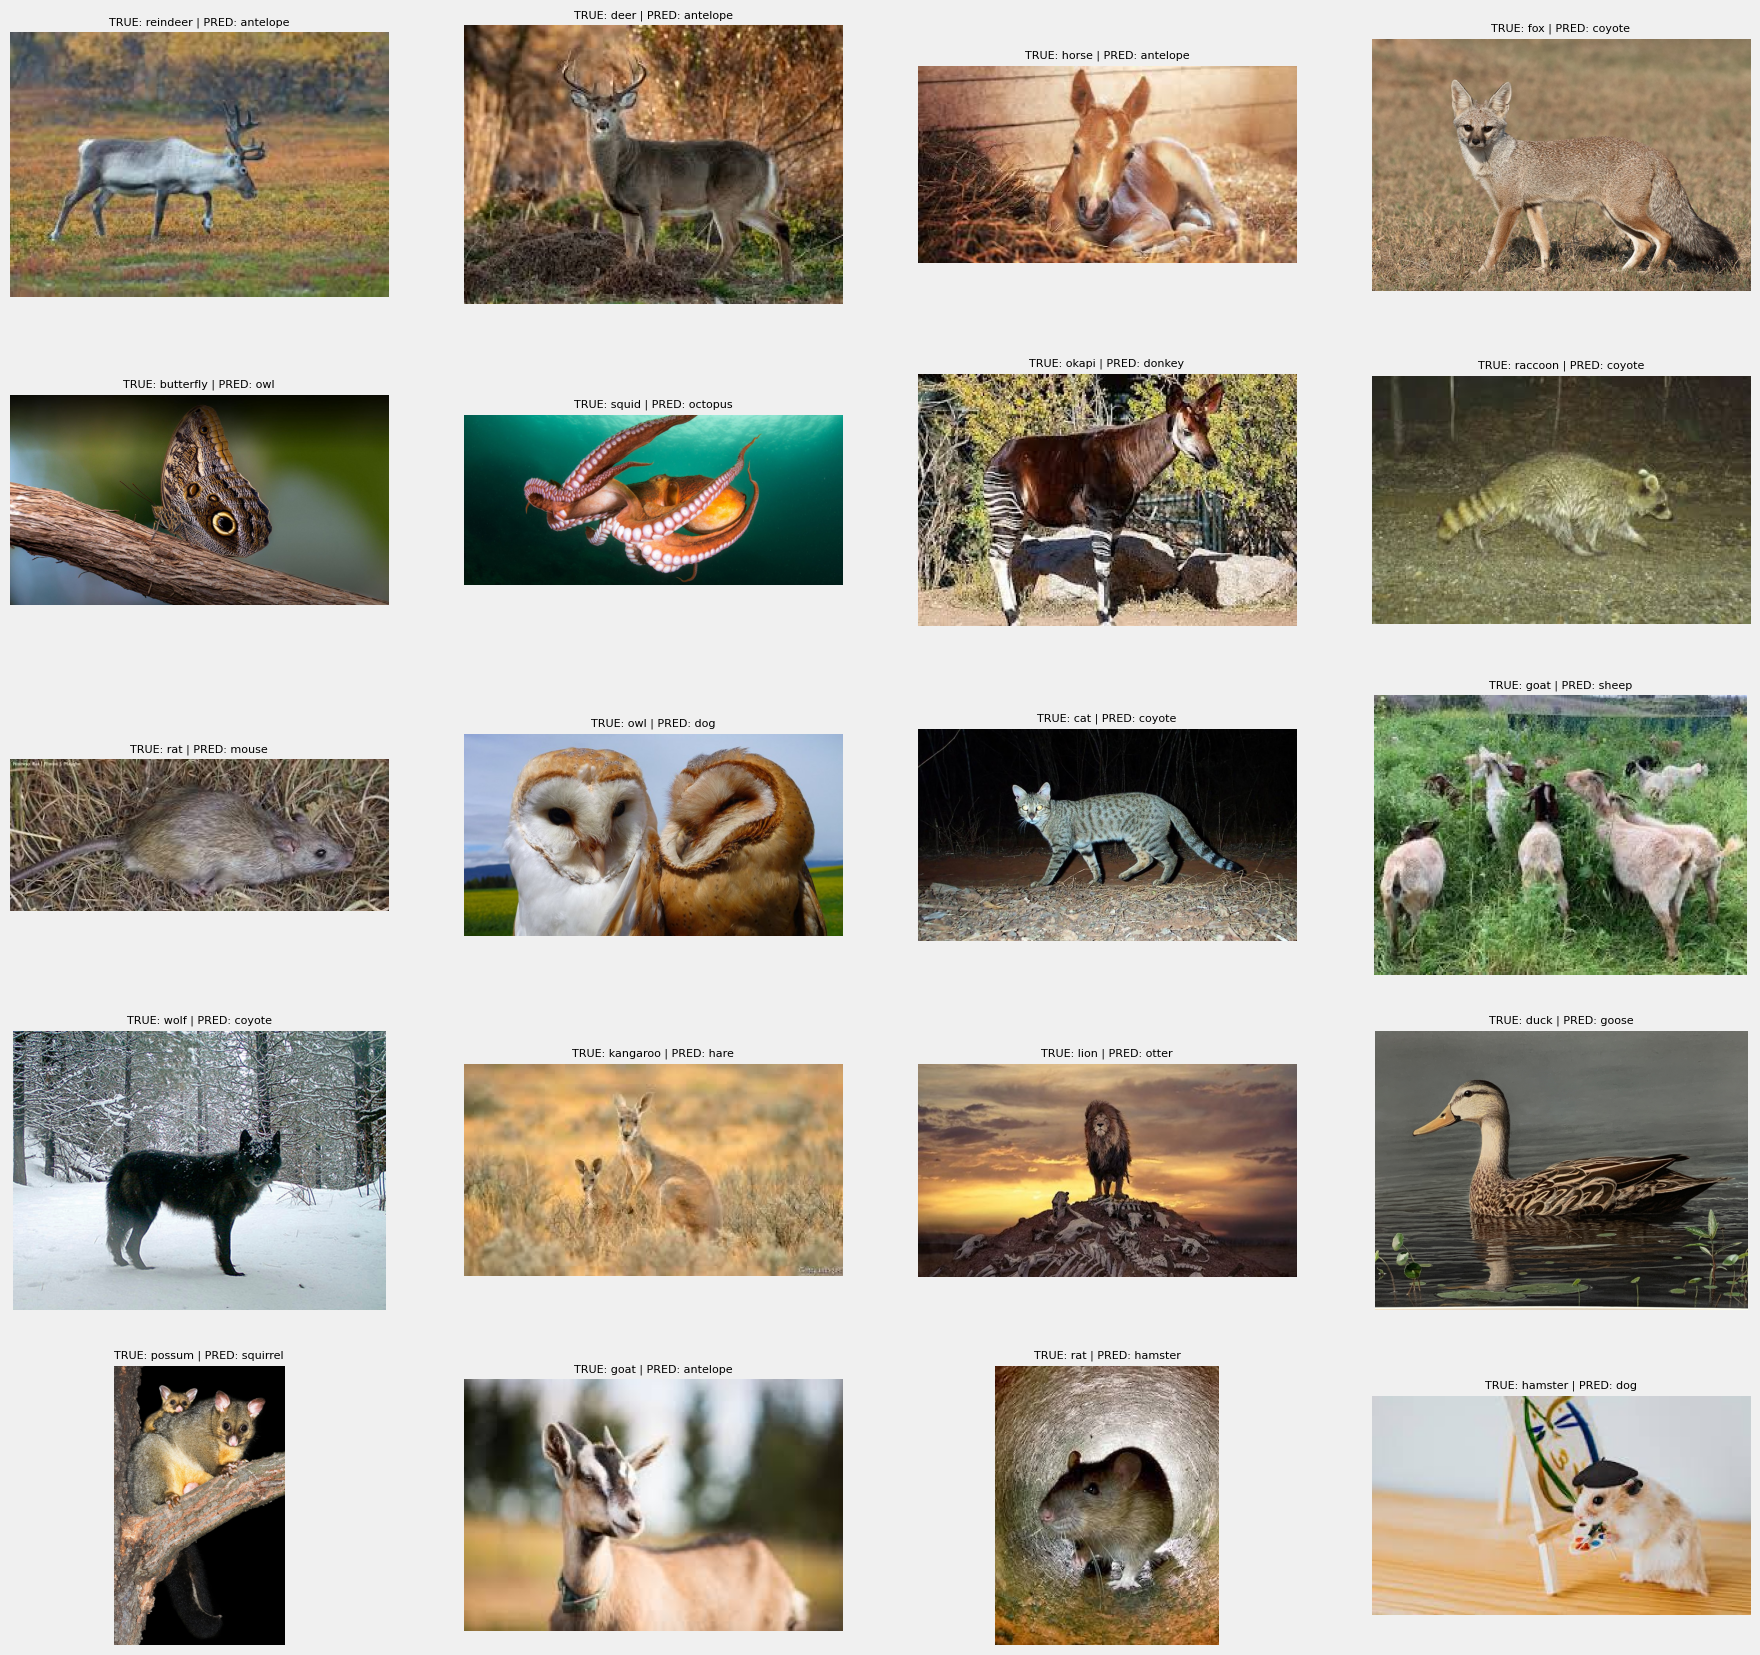

In [19]:
plt.figure(figsize=(20,20))
for i, row in Predictions[Predictions["Test Labels"] != Predictions["Prediction Labels"]].sort_values("Prediction Probability").tail(20).reset_index().iterrows():
    plt.subplot(5,4,i+1)
    image_path = row['Path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'TRUE: {row["Test Classes"]} | PRED: {row["Prediction Classes"]}', fontsize=8)
    plt.axis('off')

plt.show()

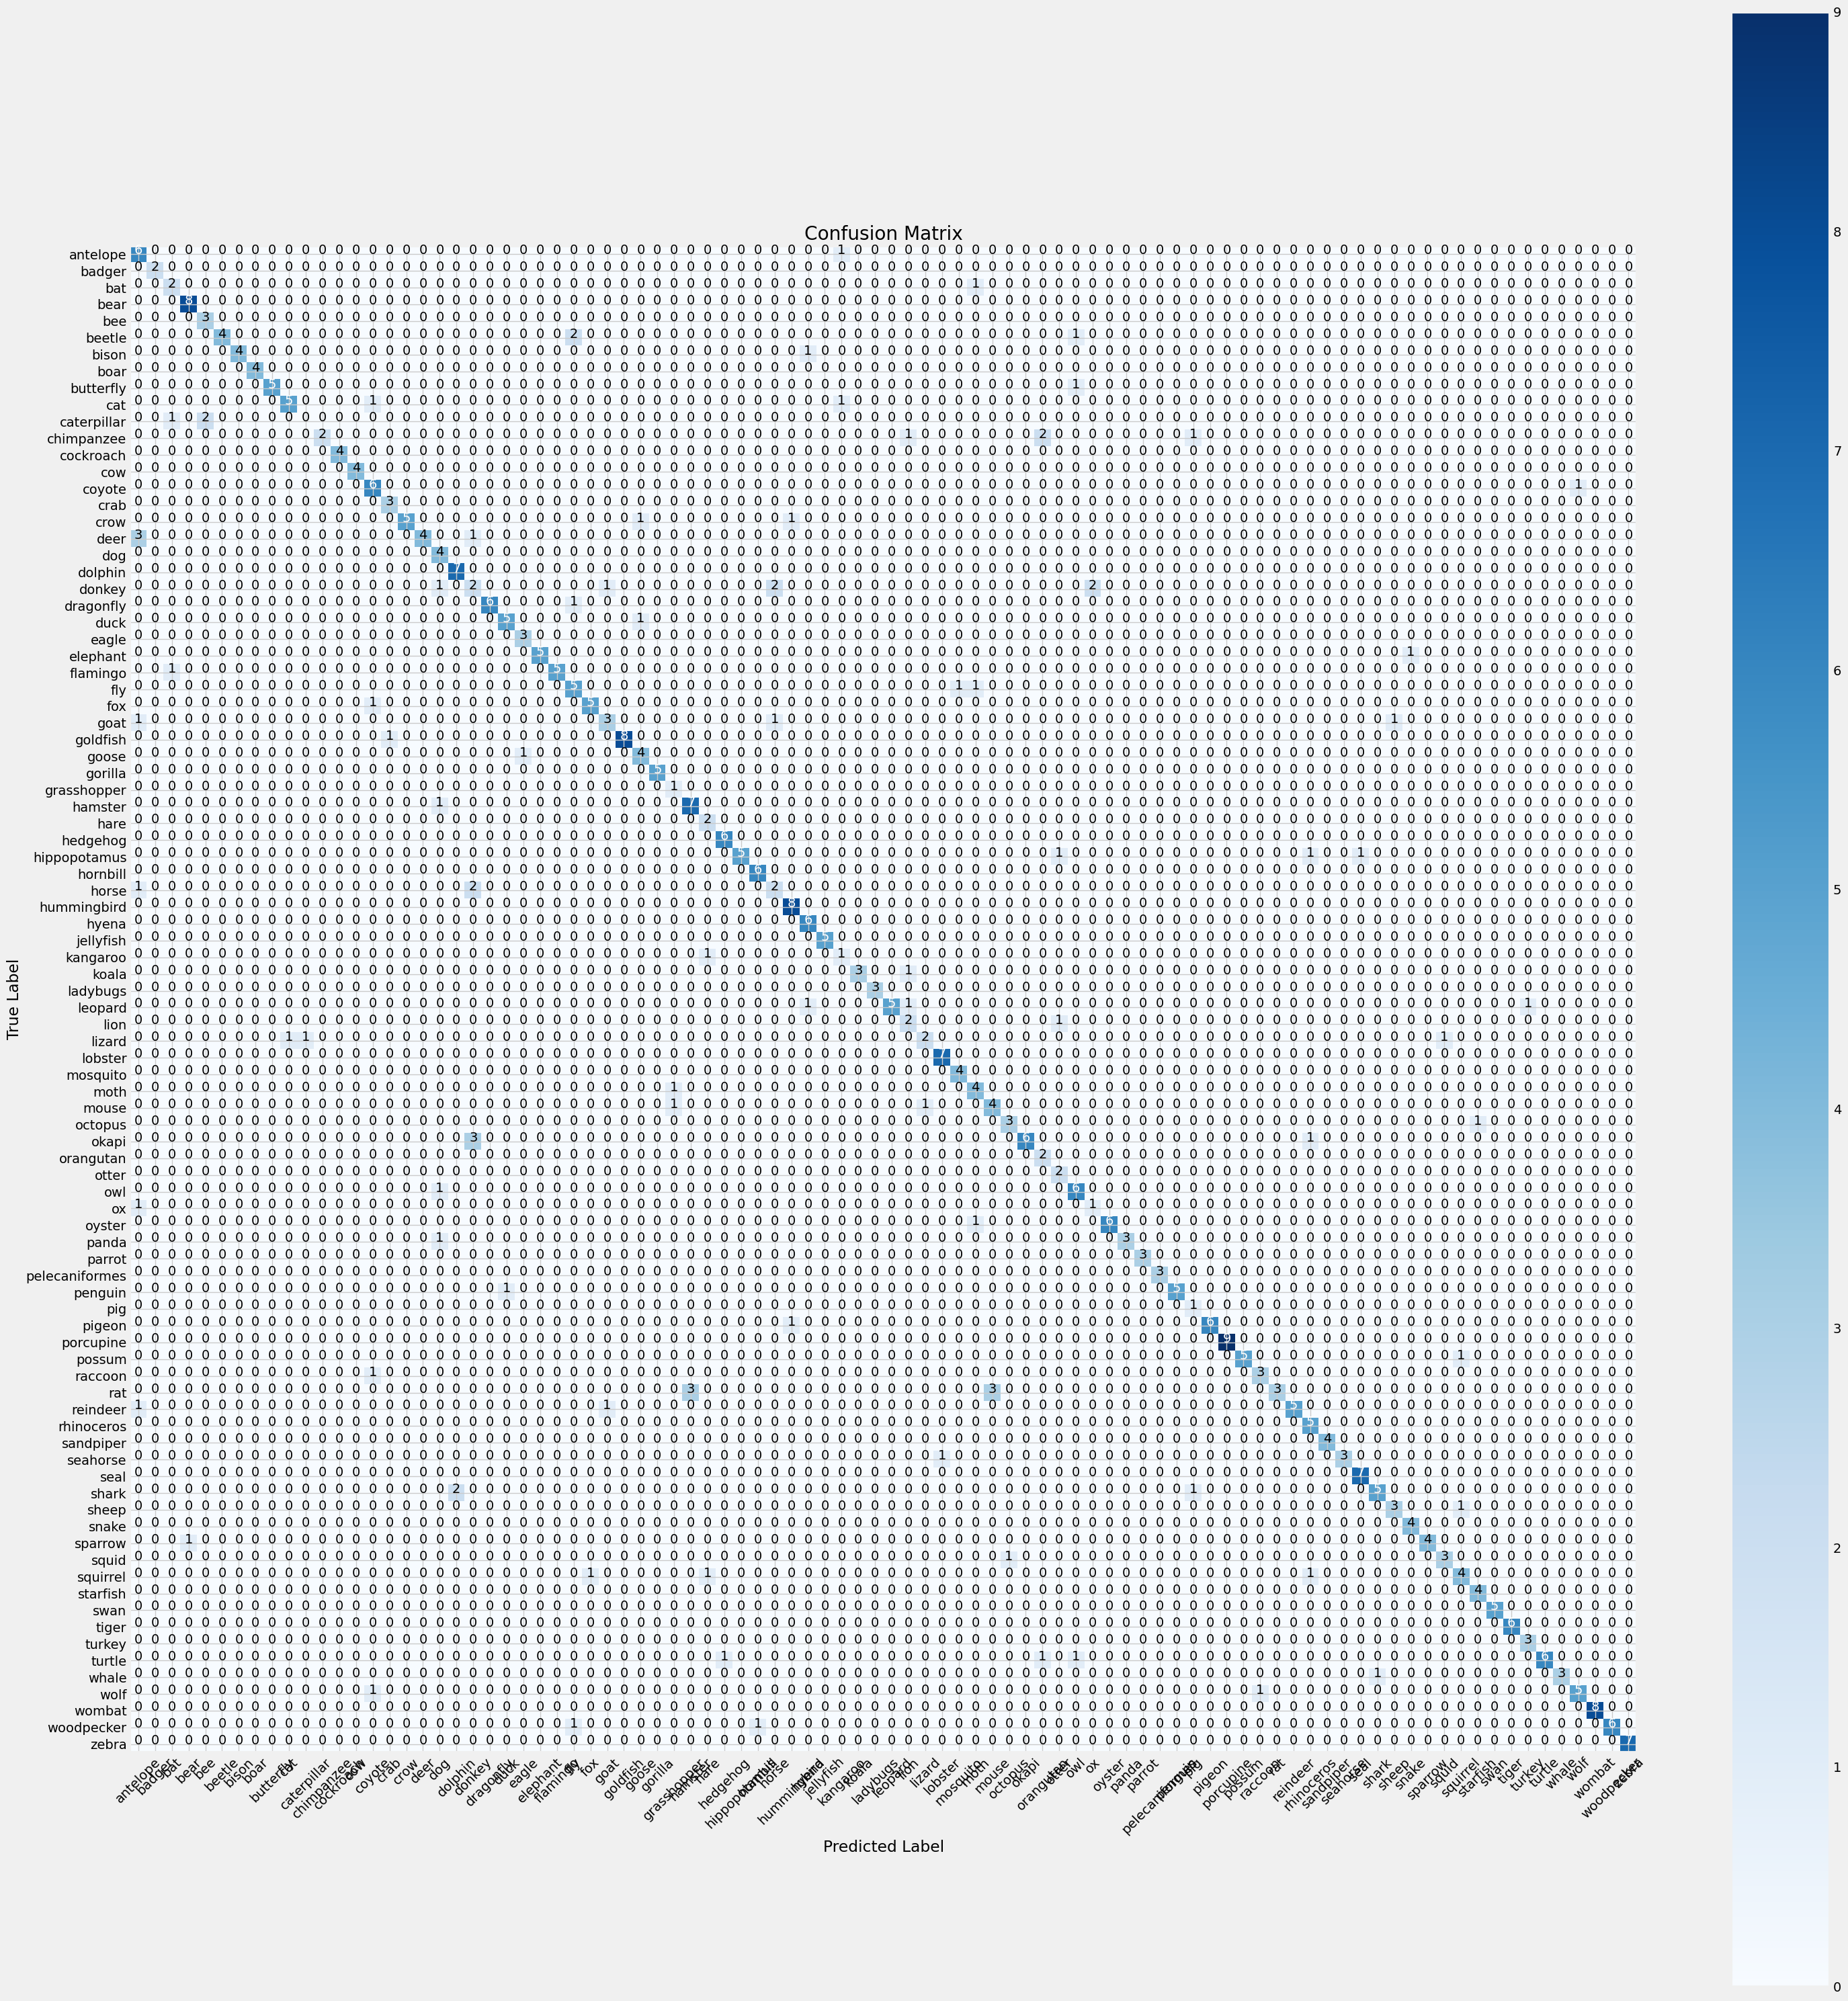

In [20]:

preds = model.predict_generator(test_images)
y_pred = np.argmax(preds, axis=1)
g_dict = test_images.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_images.classes, y_pred)

plt.figure(figsize= (30, 30))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [21]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/model3.h5')


In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image
import numpy as np

model = load_model("/content/drive/MyDrive/Colab Notebooks/model3.h5")


def preprocess_image(file_path):
    image = Image.open(file_path)
    image = image.resize((224, 224))
    image = np.array(image)
    image = preprocess_input(image)  # ResNet50 specific preprocessing
    return image



In [23]:
def predict_image(file_path):
    image = preprocess_image(file_path)
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = labels[np.argmax(prediction)]
    return predicted_label


In [24]:
labels= ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


print(labels)


['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


In [25]:
file_path = '/content/drive/MyDrive/animals/crow/03c7cea31f.jpg'
result = predict_image(file_path)
print(result)


1/1 [==============================] - 2s 2s/step
crow


In [26]:

# from flask import Flask, request, jsonify, render_template
# from tensorflow.keras.models import load_model
# from PIL import Image
# import numpy as np
# from tensorflow.keras.applications.resnet50 import preprocess_input

# app = Flask(__name__)

# # Load your trained model
# model = load_model("model2.h5")

# # Define your class labels
# labels= ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


# def preprocess_image(image):
#     image = image.resize((224, 224))  # Resize to match model input size
#     image = np.array(image)
#     image = preprocess_input(image)  # ResNet50 specific preprocessing
#     return image

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict', methods=['POST'])
# def predict():
#     try:
#         # Get the uploaded image from the request
#         file = request.files['image']
#         image = Image.open(file)
#         image = preprocess_image(image)  # Use the preprocessing function

#         # Make a prediction
#         prediction = model.predict(np.expand_dims(image, axis=0))

#         # Get the top predicted class
#         predicted_label = labels[np.argmax(prediction)]

#         return jsonify({'prediction': predicted_label})

#     except Exception as e:
#         return jsonify({'error': str(e)})

# if __name__ == '__main__':
#     app.run(debug=True)



In [27]:

# <!DOCTYPE HTML>
# <html lang="en">

# <head>
#     <title>Animal Species Predictor</title>
#     <meta http-equiv="content-type" content="text/html; charset=utf-8" />
#     <meta name="viewport" content="width=device-width, initial-scale=1">
#     <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@400;600;700&display=swap" rel="stylesheet">

#     <style>
#         body {
#             background-image: url('https://m.media-amazon.com/images/I/817MXdh2aEL._AC_UF1000,1000_QL80_.jpg');
#             background-position: center;
#             background-size: cover;
#             background-repeat: no-repeat;
#             font-family: 'Poppins', sans-serif;
#             height: 100vh;
#         }

#         h1 {
#             text-align: center;
#             font-size: 2.5em;
#             background: -webkit-linear-gradient(45deg, #8e44ad, #e74c3c);
#             -webkit-background-clip: text;
#             -webkit-text-fill-color: transparent;
#             margin-top: 10%;
#         }

#         h3 {
#             text-align: center;
#             color: #ffffff;
#             background: -webkit-linear-gradient(45deg, #8e44ad, #e74c3c);
#             -webkit-background-clip: text;
#             -webkit-text-fill-color: transparent;
#             margin-top: 2%;
#         }

#         .btn-custom-large {
#             background: linear-gradient(45deg, #8e44ad, #e74c3c);
#             border: none;
#             color: white;
#             padding: 15px 50px;
#             border-radius: 50px;
#             box-shadow: 0 8px 15px rgba(0, 0, 0, 0.1);
#             transition: all 0.3s;
#             font-weight: 600;
#             cursor: pointer;
#             display: block;
#             margin: 20px auto;
#             font-size: 20px;
#         }

#         .btn-custom-small {
#             background: linear-gradient(45deg, #8e44ad, #e74c3c);
#             border: none;
#             color: white;
#             padding: 8px 20px;
#             border-radius: 50px;
#             box-shadow: 0 8px 15px rgba(0, 0, 0, 0.1);
#             transition: all 0.3s;
#             font-weight: 600;
#             cursor: pointer;
#             display: inline-block;
#             margin-right: 10px;
#         }

#         #selectedFileName {
#             color: #ecf0f1;
#         }

#         input[type="file"] {
#             display: none;
#         }

#         form {
#             text-align: center;
#         }

# 		#prediction {
#     		display: inline-block;
#     		max-width: 70%;
#     		margin-left: auto;
#     		margin-right: auto;
#     		text-align: center;
#     		font-size: 2em;
#     		color: #FF1493;  /* Pink color for the text */
#     		margin-top: 3%;
#     		border: 2px solid white;
#     		background-color: white;   /* White background for the prediction box */
#     		padding: 10px 5px;
#     		border-radius: 20px;
#     		box-shadow: 0 8px 15px rgba(0, 0, 0, 0.1);
#     		transition: all 0.3s;
# 		  }





#     </style>
# </head>

# <body>
#     <h1>Animal Species Predictor</h1>
#     <h3>Upload an Image of an Animal</h3>
#     <form action="/predict" method="POST" enctype="multipart/form-data" id="upload-form">
#         <label for="image" class="btn-custom-small">
#             Choose File
#         </label>
#         <span id="selectedFileName">No file chosen</span>
#         <input type="file" id="image" name="image" onchange="document.getElementById('selectedFileName').textContent = this.files[0].name">
#         <div class="form-group">
#             <button type="submit" class="btn-custom-large">Upload and Predict</button>
#         </div>
#         <p id="prediction"></p>
#     </form>

#     <!-- Scripts -->
#     <script>
#         document.getElementById('upload-form').addEventListener('submit', function(e) {
#             e.preventDefault();
#             var formData = new FormData(this);
#             fetch('/predict', {
#                 method: 'POST',
#                 body: formData
#             })
#             .then(response => response.json())
#             .then(data => {
#                 document.getElementById('prediction').innerText = 'Prediction: ' + data.prediction;
#             })
#             .catch(error => {
#                 console.error('Error:', error);
#             });
#         });
#     </script>
# </body>
# </html>

